In [87]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt

uf = "RS"
uf_code = 43
capital_code = 431490 #431490 #292740 #330455 

In [88]:
file = pd.read_csv("../data/"+uf+"/"+uf+"_sih_flow.csv")

file = file[file['mun_res']>uf_code*10000][file['mun_res']<(uf_code+1)*10000]
file = file[file['mun_cnes']>uf_code*10000][file['mun_cnes']<(uf_code+1)*10000]

file.uf_code = file.uf_code.astype('string')
file.mun_res = file.mun_res.astype('int64')
file.mun_cnes = file.mun_cnes.astype('int64')

<ipython-input-88-30f16c23e6d5>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  file = file[file['mun_res']>uf_code*10000][file['mun_res']<(uf_code+1)*10000]


In [89]:
file = file[file.year >=2015][file.year <= 2019]

str_year = '_2015_2019'

<ipython-input-89-dee4aec183db>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  file = file[file.year >=2015][file.year <= 2019]


In [90]:
pop = pd.read_csv("total_populacao_%s.csv"%uf).dropna()

pop['code'] = [str(code)[:6] for code in pop['Código do município']]
pop['pop_cnes'] = [int(str(pop).replace(",", "")) for pop in pop['Total da população 2010']]
pop['pop_res'] = [int(str(pop).replace(",", "")) for pop in pop['Total da população 2010']]

In [91]:
pop_df = pd.DataFrame(pop[['code', 'pop_cnes', 'pop_res']].iloc[:-1,:].astype('int64'))

file = file.merge(pop_df[['code', 'pop_cnes']], left_on='mun_cnes', right_on='code')
file = file.merge(pop_df[['code', 'pop_res']], left_on='mun_res', right_on='code')

file_df = file[['mun_cnes', 'mun_res', 'year', 'nhospadm_total', 'pop_cnes', 'pop_res']].groupby(
    by = ['mun_cnes', 'mun_res'], as_index = False).mean()

In [92]:
# plt.figure(figsize=(8,8))

# ax = sns.scatterplot(data=file_df[file_df.mun_cnes != file_df.mun_res][file_df.mun_cnes != capital_code], 
#                 x="pop_cnes", y="pop_res", size="nhospadm_total", alpha=0.4, sizes=(1, 40), legend=False)
# ax = sns.scatterplot(data=file_df[file_df.mun_cnes == file_df.mun_res][file_df.mun_cnes != capital_code],
#                 x="pop_cnes", y="pop_res", size="nhospadm_total", alpha=0.4, sizes=(1, 300), 
#                 ax = ax, color='g', legend=False)
# sns.scatterplot(data=file_df[file_df.mun_cnes == capital_code],
#                 x="pop_cnes", y="pop_res", size="nhospadm_total", alpha=0.4, sizes=(1, 1400), 
#                 ax = ax, color='r')

# # Add titles (main and on axis)
# plt.xlabel("População do município de destino", fontsize=17)
# plt.ylabel("População do município de origem", fontsize=17)
# plt.xscale('log')
# plt.yscale('log')

# # Locate the legend outside of the plot
# plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=17)

# plt.show()

In [93]:
file_df['Tipo de fluxo:'] = file_df.shape[0]*["origem != destino"]
file_df.loc[file_df[file_df.mun_cnes == file_df.mun_res].index, 'Tipo de fluxo:'] = 'origem = destino'
file_df.loc[file_df[file_df.mun_cnes == capital_code].index, 'Tipo de fluxo:'] = 'destino = capital'

file_df = file_df.rename(columns={"nhospadm_total": "Pacientes por fluxo:"})

file_df['Pacientes/hab por fluxo:'] = file_df['Pacientes por fluxo:']/file_df['pop_res']

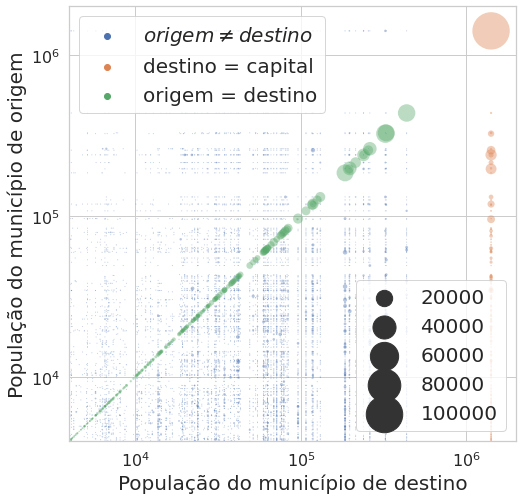

In [94]:
plt.figure(figsize=(8,8))

ax = sns.scatterplot(data=file_df.sort_values(by='Pacientes por fluxo:'), 
                x="pop_cnes", y="pop_res", size="Pacientes por fluxo:", hue='Tipo de fluxo:', alpha=0.4, sizes=(1, 1400))

# Add titles (main and on axis)
plt.xlabel("População do município de destino", fontsize=20)
plt.ylabel("População do município de origem", fontsize=20)
plt.xscale('log')
plt.yscale('log')
plt.tick_params(labelsize=16)
plt.ylim(10**3.6, None)
plt.xlim(10**3.6, None)

# Locate the legend outside of the plot
# plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=20)

legend_handles, legend_labels = ax.get_legend_handles_labels()
leg1 = ax.legend(legend_handles[1:4], [r'$origem \neq destino$']+legend_labels[2:4], 
          loc=2, fontsize=20)
ax.legend(legend_handles[5:], legend_labels[5:], 
          loc=4, fontsize=20) 
plt.gca().add_artist(leg1)

# plt.savefig('/home/gabriely/Projetos/qualificacao/figuras/origem_destino_pop_%s%s.jpeg'%(uf, str_year), bbox_inches='tight')

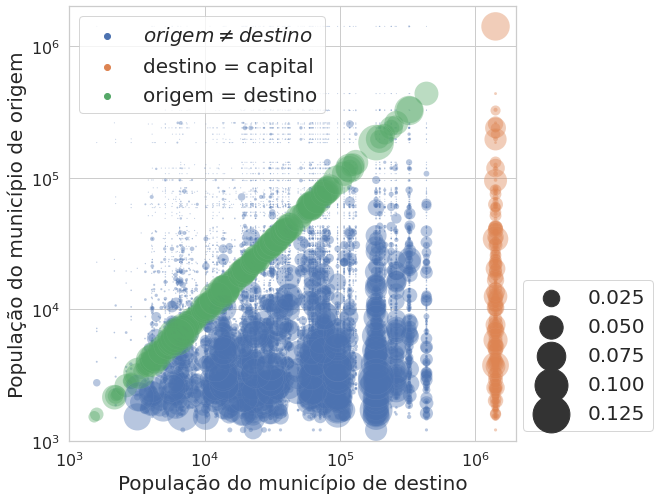

In [97]:
plt.figure(figsize=(8,8))

ax = sns.scatterplot(data=file_df.sort_values(by='Pacientes por fluxo:'), 
                x="pop_cnes", y="pop_res", size="Pacientes/hab por fluxo:", hue='Tipo de fluxo:', alpha=0.4, sizes=(1, 1400))

# Add titles (main and on axis)
plt.xlabel("População do município de destino", fontsize=20)
plt.ylabel("População do município de origem", fontsize=20)
plt.xscale('log')
plt.yscale('log')
plt.tick_params(labelsize=16)
plt.ylim(10**3, None)
plt.xlim(10**3, None)

# Locate the legend outside of the plot
# plt.legend(loc='upper left', bbox_to_anchor=(-0.1, -0.1), ncol=2, fontsize=20)

legend_handles, legend_labels = ax.get_legend_handles_labels()
leg1 = ax.legend(legend_handles[1:4], [r'$origem \neq destino$']+legend_labels[2:4], 
          loc=2, fontsize=20)
ax.legend(legend_handles[5:], legend_labels[5:], 
          loc='lower right', bbox_to_anchor=(1.33, 0), fontsize=20) 
plt.gca().add_artist(leg1)

# plt.savefig('/home/gabriely/Projetos/qualificacao/figuras/origem_destino_pop_%s_hab%s.jpeg'%(uf, str_year), bbox_inches='tight')

-----------

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
uf = "RJ"
uf_code = 33

In [43]:
file = pd.read_csv("../visualizing-health-regionalization-brazil/data/"+uf+"/"+uf+"_sih_flow.csv")

file = file[file['mun_res']>uf_code*10000][file['mun_res']<(uf_code+1)*10000]
file = file[file['mun_cnes']>uf_code*10000][file['mun_cnes']<(uf_code+1)*10000]

file.uf_code = file.uf_code.astype('string')
file.mun_res = file.mun_res.astype('int64')
file.mun_cnes = file.mun_cnes.astype('int64')

<ipython-input-43-ee4ae07bf3f6>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  file = file[file['mun_res']>uf_code*10000][file['mun_res']<(uf_code+1)*10000]
<ipython-input-43-ee4ae07bf3f6>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  file = file[file['mun_cnes']>uf_code*10000][file['mun_cnes']<(uf_code+1)*10000]


In [44]:
# get the number of hospitalizations each municipality had
hosp_per_mun_year = file[['year', 'mun_cnes', 'nhospadm_total']].groupby(
    by = ['year', 'mun_cnes'], as_index = False).sum()
# hosp_per_mun_year = hosp_per_mun_year.sort_values(ascending=False, by=['nhospadm_total'])
hosp_per_mun_year

year  mun_cnes  nhospadm_total
0     1994    330010           491.0
1     1994    330020           551.0
2     1994    330025           109.0
3     1994    330030           710.0
4     1994    330040            73.0
...    ...       ...             ...
2122  2020    330600          2467.0
2123  2020    330610          3054.0
2124  2020    330615           134.0
2125  2020    330620          2361.0
2126  2020    330630          6490.0

[2127 rows x 3 columns]

In [32]:
# # set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
# plt.figure(figsize=(14,12))
# sns.set(style="darkgrid")
# df_top5 = file[file['mun_cnes'].isin(hosp_per_mun.head(5).mun_cnes)]

# sns.stripplot(x=df_top5["nhospadm_total"], y=df_top5["mun_cnes"], size=20, marker=".", alpha=.15)

# plt.xlabel("Pacientes")
# plt. ylabel("Municípios")
# plt.show()

In [33]:
# # set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
# plt.figure(figsize=(14,12))
# plt.title("tit")
# sns.set(style="darkgrid")

# df_bottom5 = file[file['mun_cnes'].isin(hosp_per_mun.tail(5).mun_cnes)]
# sns.stripplot(x=df_bottom5["nhospadm_total"], y=df_bottom5["mun_cnes"], size=20, marker=".", alpha=.15)

# plt.xlabel("Pacientes")
# plt. ylabel("Municípios")
# plt.show()

In [34]:
# # set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
# plt.figure(figsize=(14,12))

# tmp = df_top5
# tmp = tmp.append(df_bottom5)
# sns.stripplot(x=tmp["nhospadm_total"], y=tmp["mun_cnes"], size=20, marker=".", alpha=.15)
# plt.xlabel("Pacientes")
# plt. ylabel("Municípios")
# plt.show()

---------------------------------

In [1]:
import geopandas as gpd
import pandas as pd
import geoplot
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from unidecode import unidecode

In [2]:
uf = "RJ"
uf_code = 33
capital_code = 330455 #292740 #330455

In [5]:
# import the municipalities shapes
mun_df = gpd.read_file("../data/%s/%s_mun.shp"%(uf, uf))

In [7]:
file = pd.read_csv("../data/"+uf+"/"+uf+"_sih_flow.csv")

# removing incoming/outcomming hospitalizations out from the choosen state
file = file[file['mun_res']>uf_code*10000][file['mun_res']<(uf_code+1)*10000]
file = file[file['mun_cnes']>uf_code*10000][file['mun_cnes']<(uf_code+1)*10000]

file.uf_code = file.uf_code.astype('string')
file.mun_res = file.mun_res.astype('int64')
file.mun_cnes = file.mun_cnes.astype('int64')

<ipython-input-7-5da22bc696ed>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  file = file[file['mun_res']>uf_code*10000][file['mun_res']<(uf_code+1)*10000]
<ipython-input-7-5da22bc696ed>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  file = file[file['mun_cnes']>uf_code*10000][file['mun_cnes']<(uf_code+1)*10000]


In [8]:
# get the number of hospitalizations each municipality had
hosp_per_mun_year = file[['year', 'mun_cnes', 'nhospadm_total']].groupby(
    by = ['year', 'mun_cnes'], as_index = False).sum()
hosp_per_mun_year

year  mun_cnes  nhospadm_total
0     1994    330010           491.0
1     1994    330020           551.0
2     1994    330025           109.0
3     1994    330030           710.0
4     1994    330040            73.0
...    ...       ...             ...
2122  2020    330600          2467.0
2123  2020    330610          3054.0
2124  2020    330615           134.0
2125  2020    330620          2361.0
2126  2020    330630          6490.0

[2127 rows x 3 columns]

In [9]:
hosp_per_mun = hosp_per_mun_year.groupby(
    by = ['mun_cnes'], as_index = False).mean()
hosp_per_mun = hosp_per_mun[['mun_cnes', 'nhospadm_total']]
hosp_per_mun

mun_cnes  nhospadm_total
0     330010     7132.703704
1     330015      798.250000
2     330020     4068.037037
3     330022      276.772727
4     330023     1448.000000
..       ...             ...
80    330600     7333.925926
81    330610     6179.481481
82    330615      554.076923
83    330620     5924.185185
84    330630    15190.333333

[85 rows x 2 columns]

----------------

In [10]:
gdf = gpd.GeoDataFrame(hosp_per_mun.merge(mun_df[['code', 'name', 'geometry']], left_on='mun_cnes', right_on='code'), 
                       geometry='geometry')

In [11]:
last_quartil = file[file.nhospadm_total == 56].tail(24).mun_cnes
last_quartil = last_quartil.append(file[file.nhospadm_total > 56].mun_cnes).unique()

gdf_last_quartil = gpd.GeoDataFrame(hosp_per_mun.merge(mun_df[['code', 'name', 'geometry']], left_on='mun_cnes', right_on='code'), 
                       geometry='geometry')
gdf_last_quartil = gdf_last_quartil[gdf_last_quartil.code.isin(last_quartil)]

/home/gabriely/.local/lib/python3.8/site-packages/geoplot/geoplot.py:626: UserWarning: Cannot set "figsize" when passing an "ax" to the plot. To remove this warning omit the "figsize" parameter.
  warnings.warn(


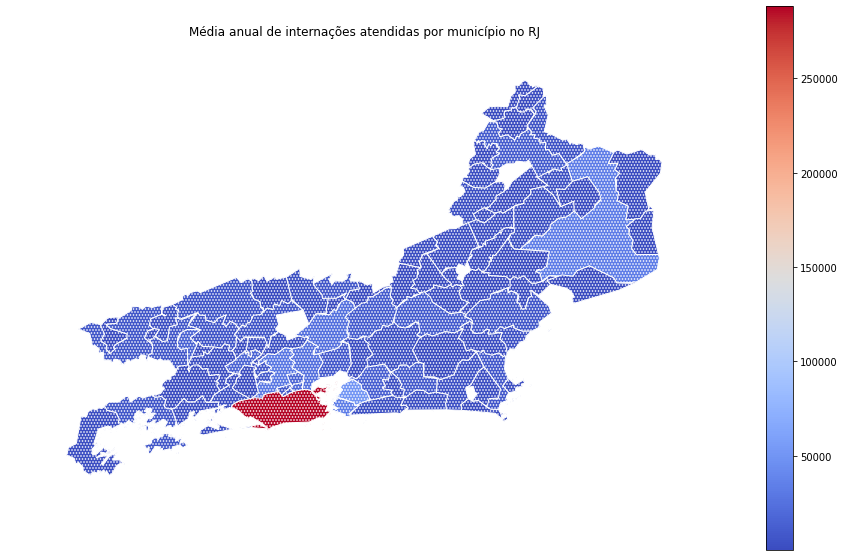

In [12]:
ax = geoplot.choropleth(
    gdf, hue='nhospadm_total',
    edgecolor='w', linewidth=1,
    cmap='coolwarm', figsize=(16, 10),
    legend=True
)
geoplot.choropleth(gdf_last_quartil, hue='nhospadm_total',
    edgecolor='w', linewidth=1,
    cmap='coolwarm', figsize=(16, 10),
    hatch='....', ax=ax)

plt.title('Média anual de internações atendidas por município no '+uf)
plt.show()

---------------------

In [1]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt

uf = "RJ"
uf_code = 343
capital_code = 330455 #431490 #292740 #330455 

file = pd.read_csv("../data/"+uf+"/"+uf+"_sih_flow.csv")

file = file[file['mun_res']>uf_code*10000][file['mun_res']<(uf_code+1)*10000]
file = file[file['mun_cnes']>uf_code*10000][file['mun_cnes']<(uf_code+1)*10000]

file.uf_code = file.uf_code.astype('string')
file.mun_res = file.mun_res.astype('int64')
file.mun_cnes = file.mun_cnes.astype('int64')

<ipython-input-1-4323c78ad4c7>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  file = file[file['mun_res']>uf_code*10000][file['mun_res']<(uf_code+1)*10000]


In [2]:
file = file[file.year >=2015][file.year <= 2019]

In [3]:
plt.figure(figsize=(16,2))
sns.set(style="darkgrid")

tmp_file = file.groupby(by = ['uf_code','mun_cnes', 'mun_res'], as_index = False).mean()
values = tmp_file.describe().nhospadm_total

ax = sns.stripplot(x=tmp_file[tmp_file.mun_cnes != capital_code]["nhospadm_total"], 
                   y=tmp_file[tmp_file.mun_cnes != capital_code]["uf_code"], color="c", size=20, marker=".", alpha=.5)
sns.stripplot(x=tmp_file[tmp_file.mun_cnes == capital_code]["nhospadm_total"], 
              y=tmp_file[tmp_file.mun_cnes == capital_code]["uf_code"], color="orange", size=15, marker=".", alpha=.5, ax=ax)

plt.xlabel("Pacientes por fluxo", fontsize=18)
plt.ylabel("")

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
text = "$\mathrm{N}=%d$\t$\mu=%.2f$\t     $\sigma=%.2f$\n$\mathrm{min}=%d$\t  $\mathrm{max}=%d$\t   $\mathrm{sum}=%d$\n$\mathrm{Q1}=%d$\t\t  $\mathrm{Q2}=%d$\t\t$\mathrm{Q3}=%d$"%(values['count'], 
            values['mean'], values['std'], values['min'], values['max'], tmp_file.nhospadm_total.sum(), values['25%'], values['50%'], values['75%'])
ax.text(0.35, 0.9, text, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

plt.show()

ValueError: min() arg is an empty sequence

<Figure size 1152x144 with 0 Axes>

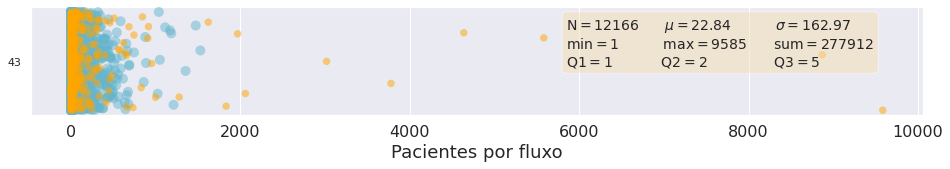

In [257]:
plt.figure(figsize=(16,2))
sns.set(style="darkgrid")

tmp_file2 = tmp_file[tmp_file.mun_cnes != tmp_file.mun_res]
values = tmp_file2.describe().nhospadm_total

ax = sns.stripplot(x=tmp_file2[tmp_file2.mun_cnes != capital_code]["nhospadm_total"], 
                   y=tmp_file2[tmp_file2.mun_cnes != capital_code]["uf_code"], color="c", size=20, marker=".", alpha=.5)
sns.stripplot(x=tmp_file2[tmp_file2.mun_cnes == capital_code]["nhospadm_total"], 
              y=tmp_file2[tmp_file2.mun_cnes == capital_code]["uf_code"], color="orange", size=15, marker=".", alpha=.5, ax=ax)

plt.xlabel("Pacientes por fluxo", fontsize=18)
plt.ylabel("")
plt.xticks(fontsize=16)

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
text = "$\mathrm{N}=%d$\t$\mu=%.2f$\t     $\sigma=%.2f$\n$\mathrm{min}=%d$\t  $\mathrm{max}=%d$\t   $\mathrm{sum}=%d$\n$\mathrm{Q1}=%d$\t\t  $\mathrm{Q2}=%d$\t\t$\mathrm{Q3}=%d$"%(values['count'], 
            values['mean'], values['std'], values['min'], values['max'], tmp_file2.nhospadm_total.sum(), values['25%'], values['50%'], values['75%'])
ax.text(0.6, 0.9, text, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

plt.show()

In [258]:
hist_df = tmp_file
hist_df['Destinado à capital'] = ['não']*hist_df.shape[0]
hist_df.loc[hist_df[hist_df.mun_cnes == capital_code].index, 'Destinado à capital'] = 'sim'
hist_df = hist_df.rename(columns={"nhospadm_total": "Pacientes por fluxo"})

(0.6309573444801932, 1000)

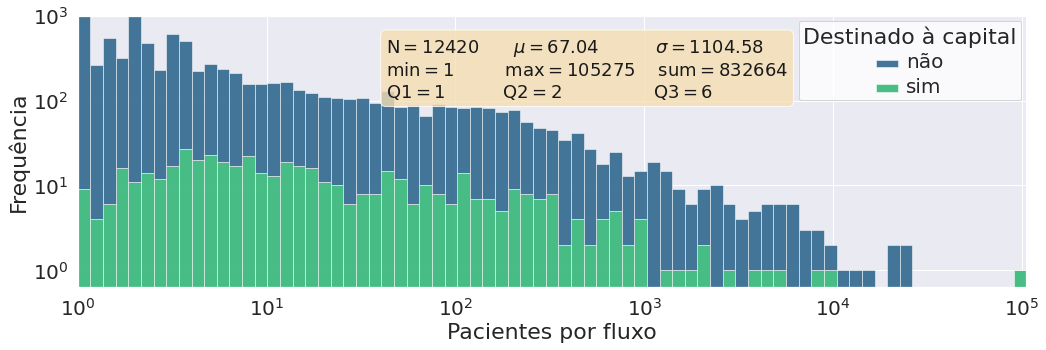

In [259]:
f, ax = plt.subplots(figsize=(17, 5))
sns.set_style("whitegrid")

tmp_df = hist_df#.append(hist_df[hist_df.mun_res == hist_df.mun_cnes][hist_df.mun_res == capital_code])
sns.histplot(tmp_df, x="Pacientes por fluxo", 
            hue="Destinado à capital",
            multiple="stack",
            palette="viridis",
            edgecolor="w",
            linewidth=.5, alpha=.9,
            log_scale=(True, True))

values = hist_df["Pacientes por fluxo"].describe()
props = dict(boxstyle='round', facecolor='wheat', alpha=.8)
text = "$\mathrm{N}=%d$      $\mu=%.2f$\t     $\sigma=%.2f$\n$\mathrm{min}=%d$\t $\mathrm{max}=%d$\t  $\mathrm{sum}=%d$\n$\mathrm{Q1}=%d$\t\t $\mathrm{Q2}=%d$\t\t$\mathrm{Q3}=%d$"%(
        values['count'], values['mean'], values['std'], values['min'], values['max'], hist_df["Pacientes por fluxo"].sum(), values['25%'], values['50%'], values['75%'])
ax.text(0.325, 0.92, text, transform=ax.transAxes, fontsize=18, color='k',
        verticalalignment='top', bbox=props)


ax.margins(0)
ax.figure.axes[0].tick_params(labelsize=20)
plt.setp(ax.get_legend().get_texts(), fontsize=20) # for legend text
plt.setp(ax.get_legend().get_title(), fontsize=22) # for legend title
ax.figure.axes[0].set_xlabel("Pacientes por fluxo",fontsize=22)
ax.figure.axes[0].set_ylabel("Frequência",fontsize=22)

plt.ylim(10**-0.2, 10**3)

# plt.savefig('/home/gabriely/Projetos/qualificacao/figuras/histograma_%s_2015_2019.jpeg'%uf, bbox_inches='tight')

In [260]:
hist_df[hist_df['Pacientes por fluxo'] > 10000]

uf_code  mun_cnes  mun_res    year  Pacientes por fluxo  \
1768      43    430460   430460  2017.0              25789.2   
2329      43    430510   430510  2017.0              22937.4   
6100      43    431340   431340  2017.0              11986.4   
6793      43    431410   431410  2017.0              21640.2   
7076      43    431440   431440  2017.0              21517.4   
7605      43    431490   431490  2017.0             105275.4   
7988      43    431560   431560  2017.0              14361.6   
8815      43    431690   431690  2017.0              13740.8   

     Destinado à capital  
1768                 não  
2329                 não  
6100                 não  
6793                 não  
7076                 não  
7605                 sim  
7988                 não  
8815                 não

In [261]:
3042/4

760.5

In [262]:
hist_df["Pacientes por fluxo"].describe()

count     12420.000000
mean         67.042240
std        1104.582536
min           1.000000
25%           1.000000
50%           2.000000
75%           6.000000
max      105275.400000
Name: Pacientes por fluxo, dtype: float64

In [263]:
soma = hist_df["Pacientes por fluxo"].sum()
soma

832664.6166666667

In [264]:
soma/4

208166.15416666667

In [287]:
x = 12196
x*100/hist_df.shape[0]

98.19645732689212

In [284]:
6 + 35 + 183 + 12196

12420

In [265]:
hist_df.shape[0]

12420

In [266]:
hist_df.sort_values(by='Pacientes por fluxo', ascending=False)

uf_code  mun_cnes  mun_res    year  Pacientes por fluxo  \
7605      43    431490   431490  2017.0             105275.4   
1768      43    430460   430460  2017.0              25789.2   
2329      43    430510   430510  2017.0              22937.4   
6793      43    431410   431410  2017.0              21640.2   
7076      43    431440   431440  2017.0              21517.4   
...      ...       ...      ...     ...                  ...   
633       43    430210   430462  2018.5                  1.0   
4608      43    431020   431057  2019.0                  1.0   
4610      43    431020   431080  2017.0                  1.0   
8735      43    431690   430957  2017.0                  1.0   
6210      43    431350   431990  2018.0                  1.0   

     Destinado à capital  
7605                 sim  
1768                 não  
2329                 não  
6793                 não  
7076                 não  
...                  ...  
633                  não  
4608                 não  
4610                 não  
8735                 não  
6210                 não  

[12420 rows x 6 columns]

In [267]:
def create_patient_table(flow_df):
    table = []
    table.append(list(flow_df.keys()))
    for i in flow_df.values:
        for j in range(int(i[4])):
            table.append(list(i))
    df = pd.DataFrame(table)
    return pd.DataFrame(df.values[1:], columns=df.iloc[0])

In [268]:
patient_df = create_patient_table(hist_df.sort_values(by='Pacientes por fluxo', ascending=False))

In [269]:
patient_df

0      uf_code mun_cnes mun_res    year Pacientes por fluxo  \
0           43   431490  431490    2017              105275   
1           43   431490  431490    2017              105275   
2           43   431490  431490    2017              105275   
3           43   431490  431490    2017              105275   
4           43   431490  431490    2017              105275   
...        ...      ...     ...     ...                 ...   
830132      43   430210  430462  2018.5                   1   
830133      43   431020  431057    2019                   1   
830134      43   431020  431080    2017                   1   
830135      43   431690  430957    2017                   1   
830136      43   431350  431990    2018                   1   

0      Destinado à capital  
0                      sim  
1                      sim  
2                      sim  
3                      sim  
4                      sim  
...                    ...  
830132                 não  
830133                 não  
830134                 não  
830135                 não  
830136                 não  

[830137 rows x 6 columns]

In [270]:
q = int(patient_df.shape[0]//4)
q

207534

In [271]:
4*q

830136

In [272]:
soma

832664.6166666667

In [273]:
patient_df.shape[0]

830137

In [274]:
patient_df.head(q)

0      uf_code mun_cnes mun_res  year Pacientes por fluxo Destinado à capital
0           43   431490  431490  2017              105275                 sim
1           43   431490  431490  2017              105275                 sim
2           43   431490  431490  2017              105275                 sim
3           43   431490  431490  2017              105275                 sim
4           43   431490  431490  2017              105275                 sim
...        ...      ...     ...   ...                 ...                 ...
207529      43   431560  431560  2017             14361.6                 não
207530      43   431560  431560  2017             14361.6                 não
207531      43   431560  431560  2017             14361.6                 não
207532      43   431560  431560  2017             14361.6                 não
207533      43   431560  431560  2017             14361.6                 não

[207534 rows x 6 columns]

In [278]:
patient_df.head(q).groupby(by = ['mun_cnes', 'mun_res'], as_index = False).sum()

0  mun_cnes  mun_res                                            uf_code  \
0    430460   430460  4343434343434343434343434343434343434343434343...   
1    430510   430510  4343434343434343434343434343434343434343434343...   
2    431410   431410  4343434343434343434343434343434343434343434343...   
3    431440   431440  4343434343434343434343434343434343434343434343...   
4    431490   431490  4343434343434343434343434343434343434343434343...   
5    431560   431560  4343434343434343434343434343434343434343434343...   

0         year  Pacientes por fluxo  \
0   52016413.0         6.650777e+08   
1   46263929.0         5.261151e+08   
2   43647880.0         4.682939e+08   
3   43399789.0         4.629899e+08   
4  212339675.0         1.108287e+10   
5   20928392.0         1.490160e+08   

0                                Destinado à capital  
0  nãonãonãonãonãonãonãonãonãonãonãonãonãonãonãon...  
1  nãonãonãonãonãonãonãonãonãonãonãonãonãonãonãon...  
2  nãonãonãonãonãonãonãonãonãonãonãonãonãonãonãon...  
3  nãonãonãonãonãonãonãonãonãonãonãonãonãonãonãon...  
4  simsimsimsimsimsimsimsimsimsimsimsimsimsimsims...  
5  nãonãonãonãonãonãonãonãonãonãonãonãonãonãonãon...

In [275]:
patient_df[q:2*q]

0      uf_code mun_cnes mun_res  year Pacientes por fluxo Destinado à capital
207534      43   431560  431560  2017             14361.6                 não
207535      43   431560  431560  2017             14361.6                 não
207536      43   431560  431560  2017             14361.6                 não
207537      43   431560  431560  2017             14361.6                 não
207538      43   431560  431560  2017             14361.6                 não
...        ...      ...     ...   ...                 ...                 ...
415063      43   431740  431740  2017              3310.8                 não
415064      43   431740  431740  2017              3310.8                 não
415065      43   431740  431740  2017              3310.8                 não
415066      43   431740  431740  2017              3310.8                 não
415067      43   431740  431740  2017              3310.8                 não

[207534 rows x 6 columns]

In [280]:
patient_df[q:2*q].groupby(by = ['mun_cnes', 'mun_res'], as_index = False).sum()

0   mun_cnes  mun_res                                            uf_code  \
0     430040   430040  4343434343434343434343434343434343434343434343...   
1     430060   430060  4343434343434343434343434343434343434343434343...   
2     430160   430160  4343434343434343434343434343434343434343434343...   
3     430210   430210  4343434343434343434343434343434343434343434343...   
4     430300   430300  4343434343434343434343434343434343434343434343...   
5     430350   430350  4343434343434343434343434343434343434343434343...   
6     430390   430390  4343434343434343434343434343434343434343434343...   
7     430470   430470  4343434343434343434343434343434343434343434343...   
8     430610   430610  4343434343434343434343434343434343434343434343...   
9     430700   430700  4343434343434343434343434343434343434343434343...   
10    430770   430770  4343434343434343434343434343434343434343434343...   
11    430920   430920  4343434343434343434343434343434343434343434343...   
12    431020   431020  4343434343434343434343434343434343434343434343...   
13    431340   431340  4343434343434343434343434343434343434343434343...   
14    431490   430060  4343434343434343434343434343434343434343434343...   
15    431490   430310  4343434343434343434343434343434343434343434343...   
16    431490   430920  4343434343434343434343434343434343434343434343...   
17    431490   430930  4343434343434343434343434343434343434343434343...   
18    431490   432300  4343434343434343434343434343434343434343434343...   
19    431560   431560  4343434343434343434343434343434343434343434343...   
20    431680   431680  4343434343434343434343434343434343434343434343...   
21    431690   431690  4343434343434343434343434343434343434343434343...   
22    431710   431710  4343434343434343434343434343434343434343434343...   
23    431720   431720  4343434343434343434343434343434343434343434343...   
24    431740   431740  4343434343434343434343434343434343434343434343...   
25    431750   431750  4343434343434343434343434343434343434343434343...   
26    431800   431800  4343434343434343434343434343434343434343434343...   
27    431830   431830  4343434343434343434343434343434343434343434343...   
28    431870   431870  4343434343434343434343434343434343434343434343...   
29    431990   431990  4343434343434343434343434343434343434343434343...   
30    432000   432000  4343434343434343434343434343434343434343434343...   
31    432240   432240  4343434343434343434343434343434343434343434343...   
32    432250   432250  4343434343434343434343434343434343434343434343...   
33    432260   432260  4343434343434343434343434343434343434343434343...   
34    432300   432300  4343434343434343434343434343434343434343434343...   

0         year  Pacientes por fluxo  \
0   10058779.0         2.487117e+07   
1   12582046.0         3.891514e+07   
2   14538536.0         5.196103e+07   
3   11980980.0         3.528835e+07   
4   11363778.0         3.174534e+07   
5    7521393.0         1.390619e+07   
6    7803773.0         1.497226e+07   
7    8656964.0         1.842384e+07   
8    7489121.0         1.378860e+07   
9   15538968.0         5.935470e+07   
10  11389999.0         3.188974e+07   
11  13852756.0         4.717080e+07   
12  10119289.0         2.517330e+07   
13  24175762.0         1.436690e+08   
14  17890790.0         7.868222e+07   
15   7618209.0         1.426724e+07   
16  11258894.0         3.116207e+07   
17   9354846.0         2.151383e+07   
18  19332945.0         9.187989e+07   
19   8037745.0         5.723098e+07   
20  18750032.0         8.641748e+07   
21  27713580.0         1.887986e+08   
22   9647311.0         2.288092e+07   
23  10698168.0         2.813348e+07   
24    451808.0         7.416192e+05   
25  10393601.0         2.655650e+07   
26   9738076.0         2.331055e+07   
27   9443594.0         2.192393e+07   
28  17202993.0         7.274896e+07   
29   8792103.0         1.900437e+07   
30  15008497.0         5.536848e+07   
31  12124187.0 

In [276]:
patient_df[2*q:3*q]

0      uf_code mun_cnes mun_res  year Pacientes por fluxo Destinado à capital
415068      43   431740  431740  2017              3310.8                 não
415069      43   431740  431740  2017              3310.8                 não
415070      43   431740  431740  2017              3310.8                 não
415071      43   431740  431740  2017              3310.8                 não
415072      43   431740  431740  2017              3310.8                 não
...        ...      ...     ...   ...                 ...                 ...
622597      43   431950  431340  2017               465.8                 não
622598      43   431950  431340  2017               465.8                 não
622599      43   431950  431340  2017               465.8                 não
622600      43   431950  431340  2017               465.8                 não
622601      43   431950  431340  2017               465.8                 não

[207534 rows x 6 columns]

In [281]:
patient_df[2*q:3*q].groupby(by = ['mun_cnes', 'mun_res'], as_index = False).sum()

0    mun_cnes  mun_res                                            uf_code  \
0      430010   430010  4343434343434343434343434343434343434343434343...   
1      430050   430050  4343434343434343434343434343434343434343434343...   
2      430080   430080  4343434343434343434343434343434343434343434343...   
3      430100   430100  4343434343434343434343434343434343434343434343...   
4      430120   430120  4343434343434343434343434343434343434343434343...   
..        ...      ...                                                ...   
179    432200   432200  4343434343434343434343434343434343434343434343...   
180    432220   432220  4343434343434343434343434343434343434343434343...   
181    432253   432253  4343434343434343434343434343434343434343434343...   
182    432270   432270  4343434343434343434343434343434343434343434343...   
183    432280   432280  4343434343434343434343434343434343434343434343...   

0         year  Pacientes por fluxo  \
0    2061374.0            1045301.6   
1     947990.0             221276.0   
2    1357441.0             453198.2   
3    2710848.0            1807142.4   
4    1772943.0             773168.4   
..         ...                  ...   
179  1710416.0             719782.4   
180  2523267.0            1565251.2   
181  1117418.0             307137.6   
182  1867742.0             857846.4   
183  2339720.0            1346296.0   

0                                  Destinado à capital  
0    nãonãonãonãonãonãonãonãonãonãonãonãonãonãonãon...  
1    nãonãonãonãonãonãonãonãonãonãonãonãonãonãonãon...  
2    nãonãonãonãonãonãonãonãonãonãonãonãonãonãonãon...  
3    nãonãonãonãonãonãonãonãonãonãonãonãonãonãonãon...  
4    nãonãonãonãonãonãonãonãonãonãonãonãonãonãonãon...  
..                                                 ...  
179  nãonãonãonãonãonãonãonãonãonãonãonãonãonãonãon...  
180  nãonãonãonãonãonãonãonãonãonãonãonãonãonãonãon...  
181  nãonãonãonãonãonãonãonãonãonãonãonãonãonãonãon...  
182  nãonãonãonãonãonãonãonãonãonãonãonãonãonãonãon...  
183  nãonãonãonãonãonãonãonãonãonãonãonãonãonãonãon...  

[184 rows x 6 columns]

In [277]:
patient_df.tail(int(q))

0      uf_code mun_cnes mun_res    year Pacientes por fluxo  \
622603      43   431950  431340    2017               465.8   
622604      43   431950  431340    2017               465.8   
622605      43   431950  431340    2017               465.8   
622606      43   431950  431340    2017               465.8   
622607      43   431950  431340    2017               465.8   
...        ...      ...     ...     ...                 ...   
830132      43   430210  430462  2018.5                   1   
830133      43   431020  431057    2019                   1   
830134      43   431020  431080    2017                   1   
830135      43   431690  430957    2017                   1   
830136      43   431350  431990    2018                   1   

0      Destinado à capital  
622603                 não  
622604                 não  
622605                 não  
622606                 não  
622607                 não  
...                    ...  
830132                 não  
830133                 não  
830134                 não  
830135                 não  
830136                 não  

[207534 rows x 6 columns]

In [282]:
patient_df.tail(int(q)).groupby(by = ['mun_cnes', 'mun_res'], as_index = False).sum()

0      mun_cnes  mun_res                                            uf_code  \
0        430003   430003  4343434343434343434343434343434343434343434343...   
1        430003   430160  4343434343434343434343434343434343434343434343...   
2        430003   430435  4343434343434343434343434343434343434343434343...   
3        430003   430660                               43434343434343434343   
4        430003   430965  4343434343434343434343434343434343434343434343...   
...         ...      ...                                                ...   
12193    432300   432150                                                 43   
12194    432300   432240                                                 43   
12195    432300   432380                                               4343   
12196    432310   432310  4343434343434343434343434343434343434343434343...   
12197    432370   432370                           434343434343434343434343   

0          year  Pacientes por fluxo  \
0      782596.0             150544.0   
1       98833.0               2440.2   
2      157326.0               6130.8   
3       20165.0                107.5   
4      391298.0              37636.0   
...         ...                  ...   
12193    2018.0                  1.0   
12194    2016.0                  1.0   
12195    4032.0                  4.0   
12196  133089.0               4389.0   
12197   24200.0                144.0   

0                                    Destinado à capital  
0      nãonãonãonãonãonãonãonãonãonãonãonãonãonãonãon...  
1      nãonãonãonãonãonãonãonãonãonãonãonãonãonãonãon...  
2      nãonãonãonãonãonãonãonãonãonãonãonãonãonãonãon...  
3                         nãonãonãonãonãonãonãonãonãonão  
4      nãonãonãonãonãonãonãonãonãonãonãonãonãonãonãon...  
...                                                  ...  
12193                                                não  
12194                                                não  
12195                                             nãonão  
12196  nãonãonãonãonãonãonãonãonãonãonãonãonãonãonãon...  
12197               nãonãonãonãonãonãonãonãonãonãonãonão  

[12198 rows x 6 columns]

In [34]:
# pop = pd.read_csv('/home/gabriely/Área de Trabalho/pop_rs.csv').astype('int')
# pop['pop'].std()

75815.57805006455